In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'errorbar.capsize': 2})
import numpy as np
import root_to_pandas
import plot_stuff

# Open Data

In [2]:
READ_PATH = 'test_data/'

List of the histogram names and the corresponding stored histograms.

In [3]:
file = uproot.open(READ_PATH+'LArPulseTest.root')
file_unweighted = uproot.open(READ_PATH+'LArPulseTestNoWeight.root')
histo_list = dict(file.classes())
histo_list

{b'hwid_126604;1': uproot.rootio.TProfile,
 b'hwid_151685;1': uproot.rootio.TProfile,
 b'hwid_200164;1': uproot.rootio.TProfile,
 b'hwid_61040;1': uproot.rootio.TProfile,
 b'hwid_7791;1': uproot.rootio.TProfile,
 b'hwid_9670;1': uproot.rootio.TProfile}

In [4]:
file.keys()

[b'hwid_7791;1',
 b'hwid_9670;1',
 b'hwid_61040;1',
 b'hwid_126604;1',
 b'hwid_151685;1',
 b'hwid_200164;1']

In [5]:
hwids = [int(key[5:-2].decode('utf-8')) for key in file.keys()]
hwids_uw = [int(key[5:-2].decode('utf-8')) for key in file_unweighted.keys()]

Obtain one of the histograms. Look at the stored members.

In [6]:
histos = [file[key] for key in file.keys()]
histos_unweighted = [file_unweighted[key] for key in file_unweighted.keys()]
histos[0]._members()

['fName',
 'fTitle',
 'fLineColor',
 'fLineStyle',
 'fLineWidth',
 'fFillColor',
 'fFillStyle',
 'fMarkerColor',
 'fMarkerStyle',
 'fMarkerSize',
 'fNcells',
 'fXaxis',
 'fYaxis',
 'fZaxis',
 'fBarOffset',
 'fBarWidth',
 'fEntries',
 'fTsumw',
 'fTsumw2',
 'fTsumwx',
 'fTsumwx2',
 'fMaximum',
 'fMinimum',
 'fNormFactor',
 'fContour',
 'fSumw2',
 'fOption',
 'fFunctions',
 'fBufferSize',
 'fBuffer',
 'fBinStatErrOpt',
 'fStatOverflows',
 'fBinEntries',
 'fErrorMode',
 'fYmin',
 'fYmax',
 'fTsumwy',
 'fTsumwy2',
 'fBinSumw2']

# Obtain Histograms and Do Plotting

In [7]:
dfs =  [root_to_pandas.hist_to_df(histo) for histo in histos]
plotting_dfs = dict(zip(hwids, dfs))

In [8]:
dfs_uw =  [root_to_pandas.hist_to_df_uw(histo) for histo in histos_unweighted]
plotting_dfs_uw = dict(zip(hwids_uw, dfs_uw))

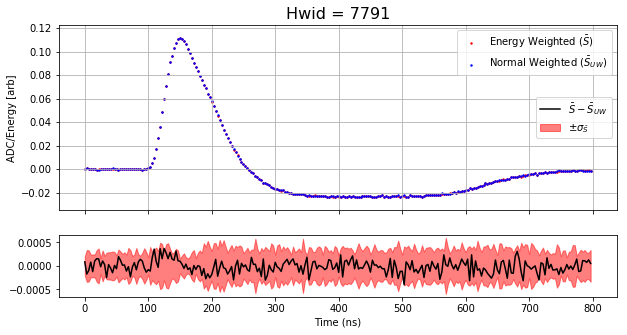

In [9]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plot_stuff.plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, hwids_uw[0])
plt.savefig('Hwid7791_good_comp', dpi=200)
plt.show()

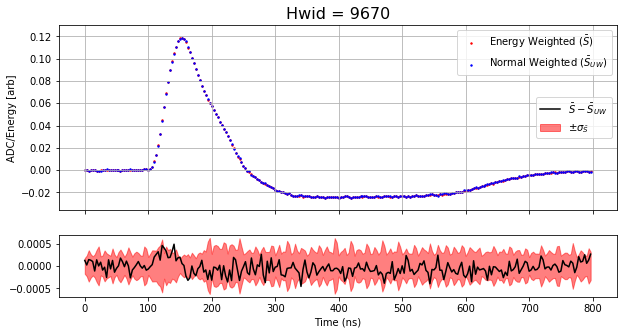

In [10]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plot_stuff.plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, hwids[1])
plt.show()

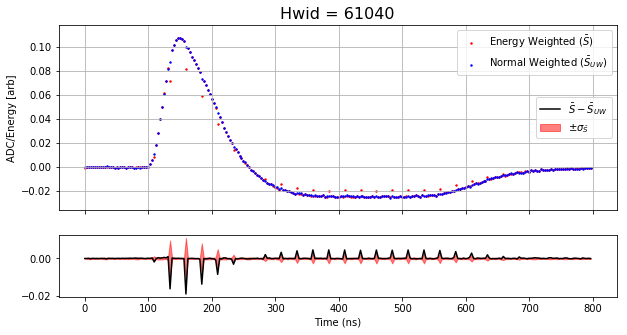

In [11]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plot_stuff.plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, hwids[2])
plt.savefig('Hwid7791_bad_comp', dpi=200)
plt.show()

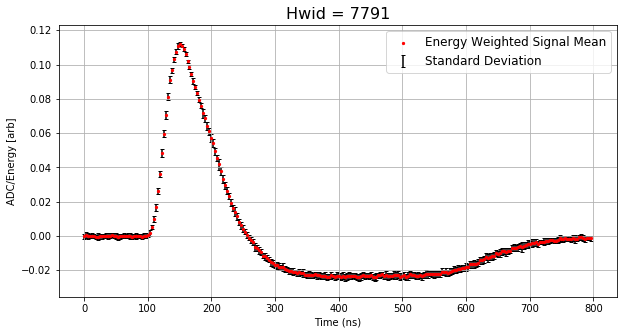

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plot_stuff.plotter_macro(ax, plotting_dfs, hwids[0])

plt.savefig('Hwid7791_good', dpi=200)
plt.show()

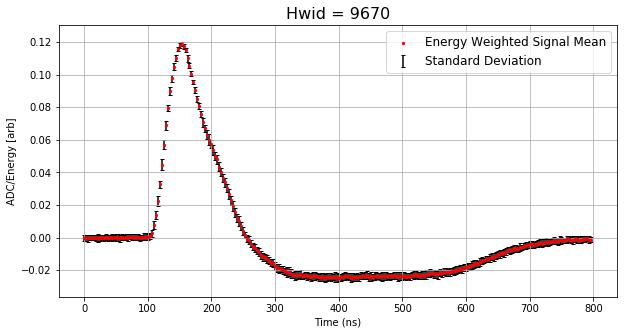

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plot_stuff.plotter_macro(ax, plotting_dfs, hwids[1])
plt.show()

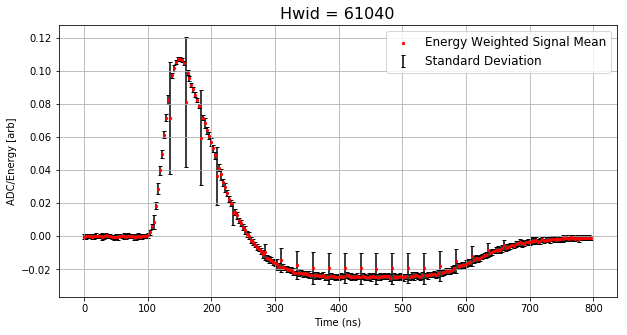

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
plot_stuff.plotter_macro(ax, plotting_dfs, hwids[2])
plt.savefig('Hwid61040_bad', dpi=200)
plt.show()

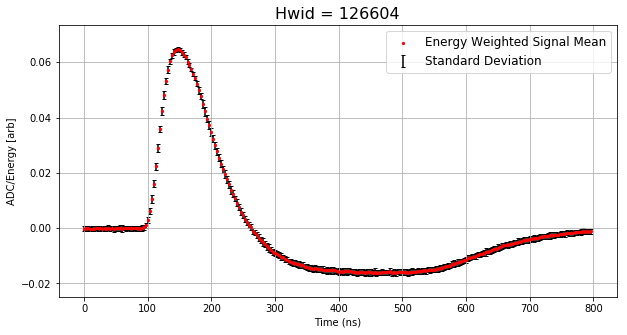

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plot_stuff.plotter_macro(ax, plotting_dfs, hwids[3])
plt.show()